In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("c:\\users\\lt\\anaconda3\\envs\\pythondata\\lib\\site-packages")
sys.path
from citipy import citipy
import time
from datetime import datetime
import requests
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | lebedyn
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | nuqui
Processing Record 5 of Set 1 | salalah
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | aksu
Processing Record 9 of Set 1 | klaksvik
Processing Record 10 of Set 1 | kavaratti
Processing Record 11 of Set 1 | sharanga
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | kavieng
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | ancud
Processing Record 17 of Set 1 | spassk-ryazanskiy
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | saleaula
City not found. Skipping...
Processing Record 20 of Set 1 | carmelo
Processing Record 21 of Set 1 | marawi
Processing Record 22 of Set 1 | busselton
Processing 

Processing Record 37 of Set 4 | nome
Processing Record 38 of Set 4 | meulaboh
Processing Record 39 of Set 4 | asfi
Processing Record 40 of Set 4 | husavik
Processing Record 41 of Set 4 | kiunga
Processing Record 42 of Set 4 | laibin
Processing Record 43 of Set 4 | gamba
Processing Record 44 of Set 4 | saint-philippe
Processing Record 45 of Set 4 | ulaangom
Processing Record 46 of Set 4 | shache
Processing Record 47 of Set 4 | bonthe
Processing Record 48 of Set 4 | fagernes
Processing Record 49 of Set 4 | lolua
City not found. Skipping...
Processing Record 50 of Set 4 | cumaribo
City not found. Skipping...


KeyboardInterrupt: 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,270.15,74,40,3.60,CA,2022-05-23 21:29:37
1,Lebedyn,50.5852,34.4849,280.07,73,80,1.51,UA,2022-05-23 21:29:37
2,Yellowknife,62.4560,-114.3525,276.44,65,75,4.12,CA,2022-05-23 21:27:02
3,Nuqui,5.7125,-77.2708,299.67,83,100,2.34,CO,2022-05-23 21:29:38
4,Salalah,17.0151,54.0924,302.20,84,75,3.60,OM,2022-05-23 21:29:38
5,Punta Arenas,-53.1500,-70.9167,276.21,75,75,10.29,CL,2022-05-23 21:29:38
6,Port Alfred,-33.5906,26.8910,289.97,72,75,1.90,ZA,2022-05-23 21:29:39
7,Aksu,41.1231,80.2644,296.53,24,97,3.25,CN,2022-05-23 21:29:39
8,Klaksvik,62.2266,-6.5890,281.66,86,100,3.10,FO,2022-05-23 21:29:39
9,Kavaratti,10.5669,72.6420,301.51,80,100,6.70,IN,2022-05-23 21:29:40


In [9]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2022-05-23 21:29:37,69.4541,-133.0374,270.15,74,40,3.60
1,Lebedyn,UA,2022-05-23 21:29:37,50.5852,34.4849,280.07,73,80,1.51
2,Yellowknife,CA,2022-05-23 21:27:02,62.4560,-114.3525,276.44,65,75,4.12
3,Nuqui,CO,2022-05-23 21:29:38,5.7125,-77.2708,299.67,83,100,2.34
4,Salalah,OM,2022-05-23 21:29:38,17.0151,54.0924,302.20,84,75,3.60
...,...,...,...,...,...,...,...,...,...
176,Saint-Philippe,RE,2022-05-23 21:33:35,-21.3585,55.7679,295.92,82,74,6.33
177,Ulaangom,MN,2022-05-23 21:31:44,49.9811,92.0667,287.61,63,98,1.12
178,Shache,CN,2022-05-23 21:33:36,38.4167,77.2406,290.21,59,99,8.71
179,Bonthe,SL,2022-05-23 21:33:36,7.5264,-12.5050,299.10,85,100,2.74


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

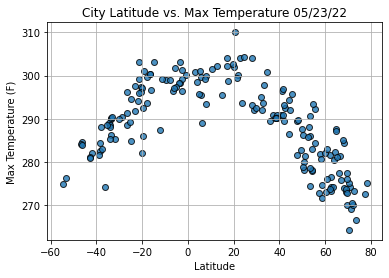

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

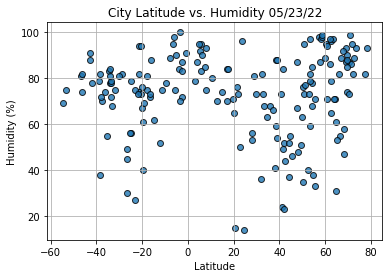

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

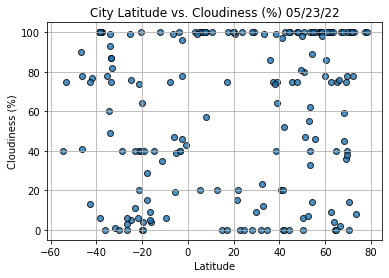

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

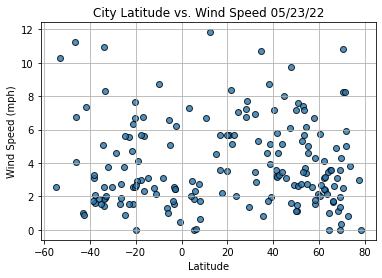

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()